In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

In [2]:
# Set to folder path
season_folder = 's15_plots'
wills_file = './wills_site_odds_2.csv'

In [3]:
wills_votes = pd.read_csv(wills_file)

In [4]:
wills_votes

,will,odds
0,Alternate Trust,2.9
1,Equivalent Exchange,3.1
2,Plunder,4.9
3,Reform,0.4
4,Transfuse,40.5
5,Move,40.6
6,Enrich,4.2
7,Foreshadow,3.4


In [5]:
#wills_votes.loc[3,'odds'] = .4


In [6]:
wills_values = {
    will:odds for will, odds in zip(wills_votes['will'], wills_votes['odds'])
}

In [7]:
sum(pd.Series(list(wills_values.values()))/100)

1.0

In [8]:
def draw_wills(wills=wills_values, ps = pd.Series(list(wills_values.values()))/100): 
    return np.random.choice(list(wills.keys()), 2, False, ps)

In [9]:
n_draws = 1_000_000
draws = {
    'will_1':[],
    'will_2':[]
}

for i in range(1,n_draws+1):
    wills = draw_wills()
    wills.sort()
    draws['will_1'].append(wills[0])
    draws['will_2'].append(wills[1])

    if i % (n_draws // 4) == 0:
        print(f'Simulation {i}...')
        
draws = pd.DataFrame(draws)

Simulation 250000...
Simulation 500000...
Simulation 750000...
Simulation 1000000...


In [10]:
will_1_freq = pd.Series(draws.groupby('will_1').size()) / draws.shape[0]
will_1_freq = will_1_freq.sort_values(ascending = False)

In [11]:
wills = pd.DataFrame(draws.groupby(['will_1'])['will_2'].value_counts(normalize=True))
wills.columns = ['prob']
wills = wills.sort_values('prob', ascending = False)
wills['will1_prob'] = wills.index.map(lambda x: will_1_freq[x[0]])
wills['relative_prob'] = wills['prob'] * wills['will1_prob']
wills = wills.sort_values('relative_prob', ascending = False).drop(columns=['prob','will1_prob'])
wills.reset_index(inplace=True)
wills['will_combo'] = wills['will_1'] + ' + ' + wills['will_2']

In [13]:
overall_probs = {}
for outcome in set(wills['will_1']).union(set(wills['will_2'])):
    overall_probs[outcome] = round(wills[(wills['will_1'] == outcome) | (wills['will_2'] == outcome)]['relative_prob'].sum(),4)

{
    key: value/2 for key, value in overall_probs.items()
}

overall_probs_df = pd.DataFrame.from_dict({key: [value] for key, value in overall_probs.items()},orient='index')
overall_probs_df.columns = ['prob']
overall_probs_df = overall_probs_df.sort_values('prob', ascending=False)
#overall_probs_df['main_will'] = overall_probs_df.index.map(lambda x: x.split()[0])
overall_probs_df

,prob
Move,0.7623
Transfuse,0.7606
Plunder,0.1231
Enrich,0.1056
Foreshadow,0.0859
Equivalent Exchange,0.0784
Alternate Trust,0.0738
Reform,0.0103


In [14]:
#most_likely_wills = overall_probs_df.groupby('main_will').sum().sort_values('prob',ascending=False)

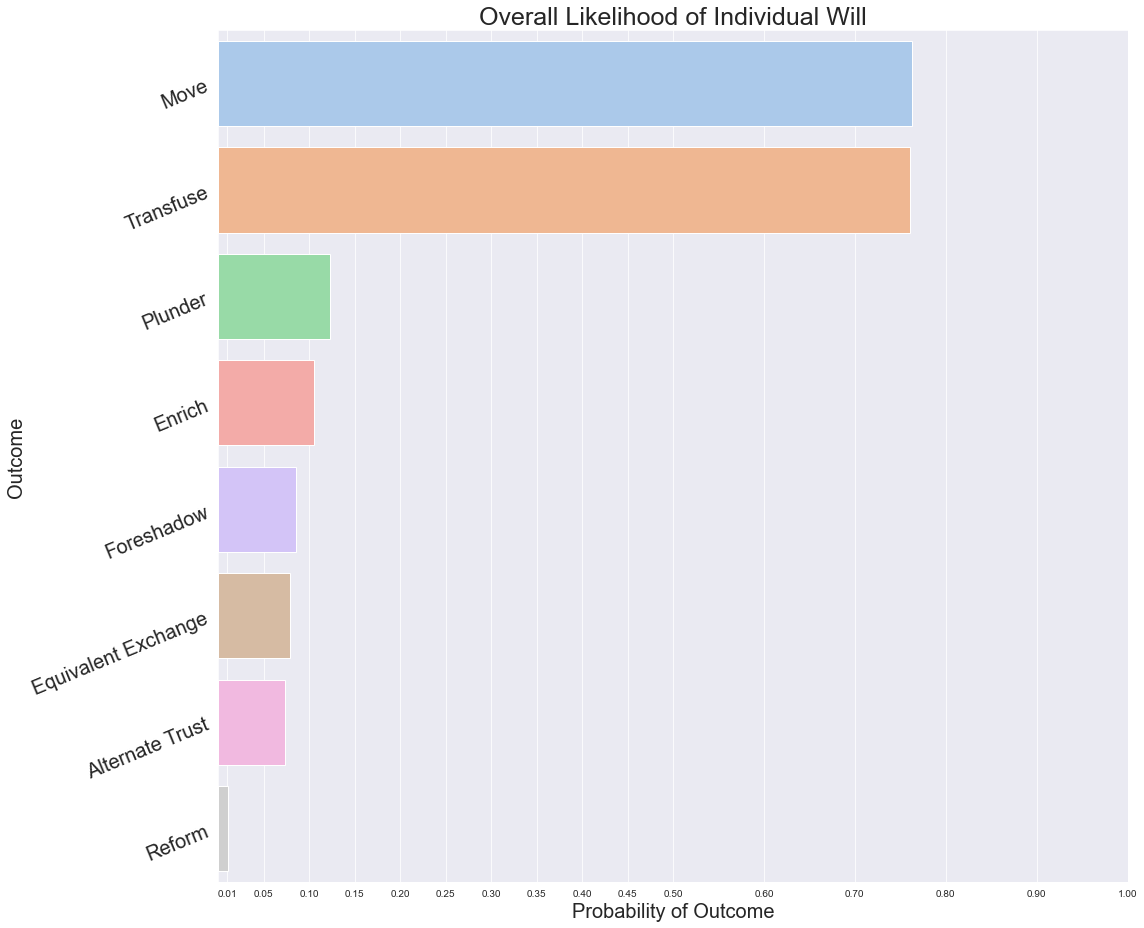

In [15]:
sns.set_style('darkgrid')
sns.set_palette('pastel')
plt.figure(figsize=(16,13))
sns.barplot(data=overall_probs_df,x='prob',y=overall_probs_df.index, orient='h')
plt.yticks(rotation=22.5, fontsize='20')
plt.xlabel('Probability of Outcome', fontsize='20')
plt.ylabel('Outcome', fontsize='20')
plt.title('Overall Likelihood of Individual Will', fontsize='25')
plt.xticks([.01,.05,.10,.15,.20,.25,.30,.35,.40,.45,.50,.60,.70,.80,.90,1])
plt.xlim(0,1)
plt.savefig(f'./{season_folder}/Magic_Wills_Individual_2.png', format='png');

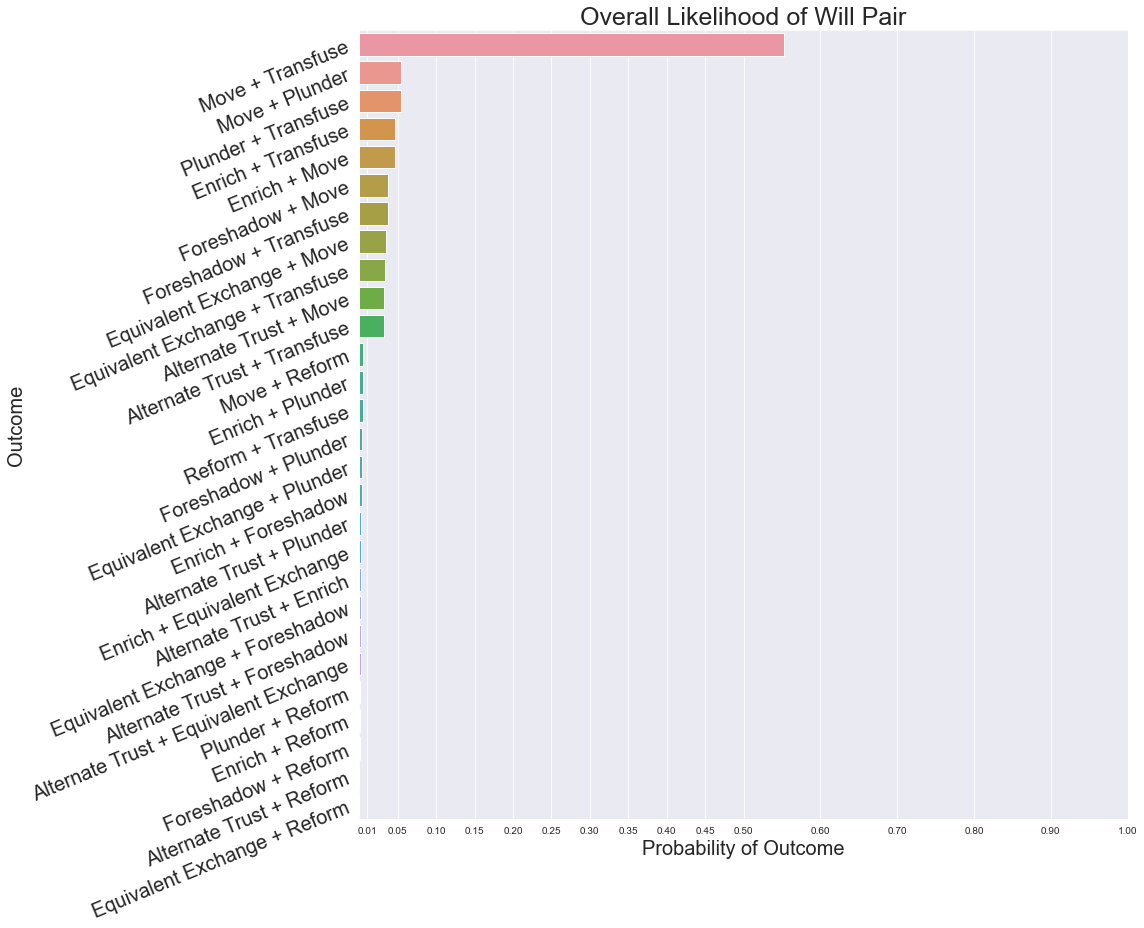

In [16]:
sns.set_style('darkgrid')
sns.set_palette('pastel')
plt.figure(figsize=(16,13))
sns.barplot(data=wills,x='relative_prob',y=wills['will_combo'], orient='h')
plt.yticks(rotation=22.5, fontsize='20')
plt.xlabel('Probability of Outcome', fontsize='20')
plt.ylabel('Outcome', fontsize='20')
plt.title('Overall Likelihood of Will Pair', fontsize='25')
plt.xticks([.01,.05,.10,.15,.20,.25,.30,.35,.40,.45,.50,.60,.70,.80,.90,1])
plt.xlim(0,1)
plt.savefig(f'./{season_folder}/Magic_Will_Pairs_2.png', format='png');

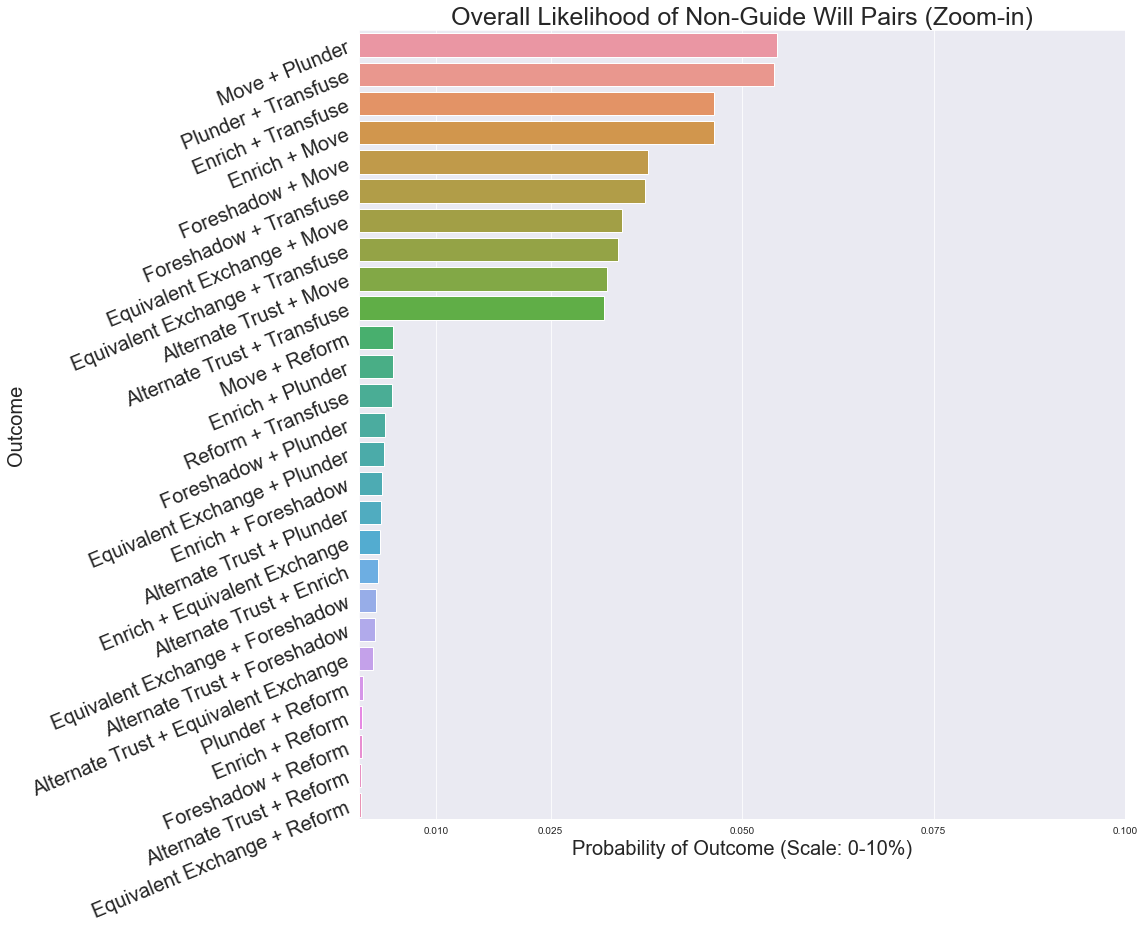

In [17]:
sns.set_style('darkgrid')
sns.set_palette('pastel')
plt.figure(figsize=(16,13))
sns.barplot(data=wills.iloc[1:,:],x='relative_prob',y=wills['will_combo'][1:], orient='h')
plt.yticks(rotation=22.5, fontsize='20')
plt.xlabel('Probability of Outcome (Scale: 0-10%)', fontsize='20')
plt.ylabel('Outcome', fontsize='20')
plt.title('Overall Likelihood of Non-Guide Will Pairs (Zoom-in)', fontsize='25')
plt.xticks([.01,.025,.05,.075,.10])
plt.xlim(0,.1)
plt.savefig(f'./{season_folder}/Magic_Will_Pairs_Off_Plan_2.png', format='png');